# SVO 2: Gendered Subjects

In this notebook, we explore usage of male and female pronouns and nouns as subjects in both subcorpora: first by raw count, and then by actions (verbs) associated with those nouns and pronouns.

**Next Steps**: Work on code to compile / visualize this as a network graph (?).

We begin by loading the SVOs saved to CSVs.

---

**Possible worth looking into**: in a prior code run, we had fed the function a list of pronouns asked it to output only those SVOs: `pronouns = ['i', 'we', 'she', 'he', 'they', 'it', 'you']`. Comparing the two outputs: there are 80,331 SVOs in total in the male speaker subcorpora and 56,781 begin with on of the pronouns listed above and 26,527 total SVOs for the female speaker subcorpus with 18,602 beginning with pronouns, then the preponderance of sentences in TED talks begin with a rather small set of pronouns:

```
male:   56,781 / 80,331 = .706
female: 18,602 / 26,527 = .701
```
*The counts are not precise, but they represent a possible trend worth investigating.*

In [1]:
# IMPORTS
import pandas as pd
import networkx as nx
import numpy as np
import plotly.graph_objects as go

In [13]:
# LOAD DATAFRAMES
svos_m = pd.read_csv("../output/svos_m_lem.csv", index_col=0)
svos_w = pd.read_csv("../output/svos_w_lem.csv", index_col=0)

print(svos_m.shape[0], svos_w.shape[0])

80460 26610


## Subjects

The function below allows us to compare the usage of subjects across the two subcorpora, returning both a raw count and a percentage of the SVO count of the subcorpus.

In [3]:
def compare (subject):
    # Create name:
    m_tmp = svos_m[svos_m["subject"] == subject]
    w_tmp = svos_w[svos_w["subject"] == subject]
    print(f'''
    | ♂︎ "{subject}" | {m_tmp.shape[0]} | {m_tmp.shape[0]/svos_m.shape[0]:.3f} |
    | ♀︎ "{subject}" | {w_tmp.shape[0]} | {w_tmp.shape[0]/svos_w.shape[0]:.3f} |''')
    
compare("he")


    | ♂︎ "he" | 2548 | 0.032 |
    | ♀︎ "he" | 757 | 0.028 |


### Third Person Perspective

In [4]:
thirdPerson = ['he', 'she', 'man', 'woman', 'men', 'women', 'actor', 'actress']

for i in thirdPerson:
    compare(i)


    | ♂︎ "he" | 2548 | 0.032 |
    | ♀︎ "he" | 757 | 0.028 |

    | ♂︎ "she" | 848 | 0.011 |
    | ♀︎ "she" | 643 | 0.024 |

    | ♂︎ "man" | 80 | 0.001 |
    | ♀︎ "man" | 13 | 0.000 |

    | ♂︎ "woman" | 24 | 0.000 |
    | ♀︎ "woman" | 35 | 0.001 |

    | ♂︎ "men" | 40 | 0.000 |
    | ♀︎ "men" | 23 | 0.001 |

    | ♂︎ "women" | 37 | 0.000 |
    | ♀︎ "women" | 62 | 0.002 |

    | ♂︎ "actor" | 3 | 0.000 |
    | ♀︎ "actor" | 1 | 0.000 |

    | ♂︎ "actress" | 0 | 0.000 |
    | ♀︎ "actress" | 0 | 0.000 |


### First & Second Person

In [5]:
firstSecond = ["i", "we", "you"]

for i in firstSecond:
    compare(i)


    | ♂︎ "i" | 15440 | 0.192 |
    | ♀︎ "i" | 6185 | 0.232 |

    | ♂︎ "we" | 15458 | 0.192 |
    | ♀︎ "we" | 4652 | 0.175 |

    | ♂︎ "you" | 11949 | 0.149 |
    | ♀︎ "you" | 3117 | 0.117 |


### Other Subjects

In [6]:
# This is just a placeholder for more interesting words
otherSubjects =  ['subject', 'object']

for i in otherSubjects:
    compare(i)


    | ♂︎ "subject" | 9 | 0.000 |
    | ♀︎ "subject" | 2 | 0.000 |

    | ♂︎ "object" | 7 | 0.000 |
    | ♀︎ "object" | 5 | 0.000 |


## Verbs

We need either a collection of dataframes or one dataframe which has just the subjects above along with the most common verbs: this will give us a sense of the actions associated with particular subjects, the active spaces characters occupy. 

The code below is a sample based on your earlier work. The question is how to do this *at scale*: feeding a list of subjects and then getting 

In [14]:
m_he = svos_m[svos_m["subject"] == "he"].groupby(["verb"]).size().reset_index(
    name='obs').sort_values(['obs'], ascending=False).iloc[:20]
m_he

,verb,obs
200,have,232
387,say,132
125,do,111
188,get,90
190,go,78
450,take,78
494,want,71
259,make,67
455,tell,58
336,put,54


Below is my attempt to create a function that would return an appropriately named dataframe which was 20 rows long and contained the top 20 verbs for a given subject. It does not work in the `for` loop in the cell below. It returns the dataframe, but the name of the dataframe does not come along for the ride.

In [15]:
def verbCount(dataframe, prefix, subject, num_top_verbs):
    # Create a unique name for the dataframe
    name = (prefix+'_'+subject)
    # Create the [temp] dataframe
    name = dataframe[dataframe["subject"] == subject].groupby(
        ["verb"]).size().reset_index(name='obs').sort_values(
        ['obs'], ascending=False).iloc[:num_top_verbs]
    return name

In [16]:
m_she = verbCount(svos_m, "m", "she", 40)
m_she.head()

,verb,obs
94,have,94
178,say,47
61,do,41
87,go,34
238,want,32


In [17]:
genderedSubjects = ['she', 'he', 'man', 'men', 'woman', 'women']
for i in genderedSubjects:
    verbCount(svos_w, "w", i, 30)

The code above is not working: it is not creating a bunch of smaller dataframes, the following print statement reveals:
```python
print(w_man)
```
```
NameError: name 'w_man' is not defined
```

But I also realized that this is not necessary. One could use the larger dataframe and filter things there or move the SVOS into a network and manipulate things there. (See section below.)

## SVO Networks

### A Small Test Network

While we eventually might like to have a network of `subject > verb > object` for now, let's work with the `m_she` dataframe and build a network with sources, targets, and edge attributes.

In [18]:
# Re-insert a column for "she"
m_she["subject"] = "she"

# Re-arrange columns so that they are in a more obvious order
m_she = m_she[["subject", "verb", "obs"]]

m_she.shape

(40, 3)

In [15]:
# Create the graph
# Reference: https://stackoverflow.com/questions/53937259/converting-a-pandas-dataframe-to-a-networkx-graph
G = nx.from_pandas_edgelist(m_she, source='subject', target='verb', edge_attr=True)

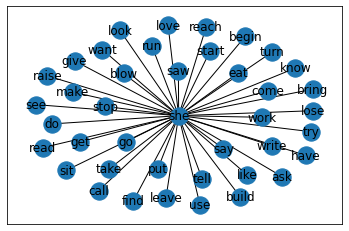

In [16]:
nx.draw_networkx(G)

This is not a very clear graph, and, honestly, I think we would rather be able to choose the number of nodes at the network level rather than at the dataframe level: being able to adjust the network visualization is a real boon.

In [17]:
G.edges.data()

EdgeDataView([('she', 'have', {'obs': 94}), ('she', 'say', {'obs': 47}), ('she', 'do', {'obs': 41}), ('she', 'go', {'obs': 34}), ('she', 'want', {'obs': 32}), ('she', 'get', {'obs': 24}), ('she', 'take', {'obs': 23}), ('she', 'give', {'obs': 21}), ('she', 'tell', {'obs': 20}), ('she', 'find', {'obs': 19}), ('she', 'start', {'obs': 17}), ('she', 'make', {'obs': 16}), ('she', 'try', {'obs': 15}), ('she', 'use', {'obs': 11}), ('she', 'bring', {'obs': 11}), ('she', 'know', {'obs': 10}), ('she', 'see', {'obs': 9}), ('she', 'saw', {'obs': 9}), ('she', 'come', {'obs': 8}), ('she', 'stop', {'obs': 8}), ('she', 'ask', {'obs': 8}), ('she', 'leave', {'obs': 7}), ('she', 'read', {'obs': 7}), ('she', 'eat', {'obs': 6}), ('she', 'write', {'obs': 6}), ('she', 'call', {'obs': 6}), ('she', 'like', {'obs': 5}), ('she', 'lose', {'obs': 5}), ('she', 'put', {'obs': 5}), ('she', 'sit', {'obs': 5}), ('she', 'reach', {'obs': 5}), ('she', 'look', {'obs': 5}), ('she', 'build', {'obs': 5}), ('she', 'raise', {'ob

### Sankey Diagrams

### Plotly

Ken Lok has a terrific [Sankey diagram generator](https://medium.com/kenlok/how-to-create-sankey-diagrams-from-dataframes-in-python-e221c1b4d6b0). The solution arrived at here is based on a [Stackoverflow answer](https://stackoverflow.com/questions/70335771/how-do-i-make-a-sankey-diagram-with-plotly-with-one-layer-that-goes-only-one-lev) by [Rob Raymond](https://stackoverflow.com/users/9441404/rob-raymond), which offered two useful answers to questions I had: first, how to compile the subjects and verbs into lists that could be fed into Ploty's Sankey function. Raymond offers the following -- the `m_she` below is left over from an earlier experiment:
```
nodes = np.unique(m_she[["subject", "verb"]], axis=None)
nodes = pd.Series(index=nodes, data=range(len(nodes)))
```
And the second was a quick solution to creating a figure:
```
go.Figure(
    go.Sankey(
        node={"label": nodes.index},
        link={
            "source": nodes.loc[m_she["subject"]],
            "target": nodes.loc[m_she["verb"]],
            "value": m_she["obs"],
        },
    )
)
```
Combining those two pieces with the `verbCount` function above results in `sankify`:

In [6]:
import kaleido

[Plotly Sankey documenation](https://plotly.com/python-api-reference/generated/plotly.graph_objects.Sankey.html#plotly.graph_objects.Sankey
)

In [19]:
def sankify(dataframe, subject, num_top_verbs):
    
    # Create the subject-focused dataframe
    df = dataframe[dataframe["subject"] == subject].groupby(
        ["verb"]).size().reset_index(name='obs').sort_values(
        ['obs'], ascending=False).iloc[:num_top_verbs]
    
    # Re-insert a column for the subject
    df["subject"] = subject

    # Re-arrange columns so that they are in a more obvious order
    df = df[["subject", "verb", "obs"]]

    nodes = np.unique(df[["subject", "verb"]], axis=None)
    nodes = pd.Series(index=nodes, data=range(len(nodes)))

    fig = go.Figure(
        go.Sankey(
            node={"label": nodes.index},
            link={
                "source": nodes.loc[df["subject"]],
                "target": nodes.loc[df["verb"]],
                "value": df["obs"],
            },
            legendgrouptitle={"text": "Title"}
        )
    )
    fig.show()
    # Both of the options below require the kaleido package
#     fig.show(renderer="png")
#     fig.show(renderer="svg")

In [20]:
sankify(svos_w, "she", 30)

That functionality gives us one subject and the X number of top verbs associated with it. Since the visualization code works well enough, we break it out from the part that counts the verbs and the re-creates a dataframe with the subject.  

In [27]:
def SVOverbs(dataframe, subject, num_top_verbs):
    
    # Create the subject-focused dataframe
    df = dataframe[dataframe["subject"] == subject].groupby(
        ["verb"]).size().reset_index(name='obs').sort_values(
        ['obs'], ascending=False).iloc[:num_top_verbs]
    
    # Re-insert a column for the subject
    df["subject"] = subject

    # Re-arrange columns so that they are in a more obvious order
    df = df[["subject", "verb", "obs"]]
    return df

def sankay (df):
    # Merge the two columns of subjects and verbs
    nodes = np.unique(df[["subject", "verb"]], axis=None)
    # Assign each node a unique ID
    nodes = pd.Series(index=nodes, data=range(len(nodes)))
    # Use Ploty's Sankey trace (which is really hard to understand)
    fig = go.Figure(
        go.Sankey(
            node={"label": nodes.index},
            link={
                "source": nodes.loc[df["subject"]],
                "target": nodes.loc[df["verb"]],
                "value": df["obs"],
            },
        )
    )
    fig.show()

In [28]:
w_she = SVOverbs(svos_w, "she", 30)
w_he = SVOverbs(svos_w, "he", 30)

w_she_he = pd.concat([w_she, w_he], ignore_index=True)
w_she_he.shape

sankay(w_she_he)

In [23]:
w_i = SVOverbs(svos_w, "i", 30)

w_she_he_i = pd.concat([w_she_he, w_i], ignore_index=True)
w_she_he_i.shape

(90, 3)

In [25]:
# w_she_he_i.to_csv("../output/w_she_he_i.csv")

In [24]:
sankay(w_she_he_i)

In [ ]:
# pandas preferred way to append dataframes together
# pd.concat([pd.DataFrame([i], columns=['A']) for i in range(5)], ignore_index=True)

In [10]:
from ipysankeywidget import SankeyWidget
from floweaver import *

ModuleNotFoundError: No module named 'floweaver'

## Character Spaces as Verb-Feature Spaces

The goal in this section is to:

1. Collect all the verbs associated with the specified subjects
2. Weight the verbs (by normalization)
3. Compare the verbs manually
4. Visualize a comparison using PCA or t-SNE

First we explore the total number of verbs involved:

In [25]:
# Collect all the verbs from the women's subcorpus
verbs_w = svos_w.groupby(["verb"]).size().reset_index(name='obs').sort_values(
        ['obs'], ascending=False)

# Select only the verbs that occur more than once
verbs_gt_w = verbs_w[verbs_w.obs > 2]

# What's our counts?
print(f"♀︎: {verbs_w.shape[0]} unique verbs; {verbs_gt_w.shape[0]} occur more than once")

♀︎: 1687 unique verbs; 743 occur more than once


In [26]:
# Repeat for the men's subcorpus
verbs_m = svos_m.groupby(["verb"]).size().reset_index(name='obs').sort_values(
        ['obs'], ascending=False)
verbs_gt_m = verbs_m[verbs_m.obs > 2]

print(f"♂︎: {verbs_m.shape[0]} unique verbs; {verbs_gt_m.shape[0]} occur more than once")

♂︎: 2631 unique verbs; 1317 occur more than once


Now we need to grab the verbs associated with the subjects:

In [27]:
# Create a list of the subjects for which we want SVOs
subjects = ['she', 'he', 'i']

# Filter the dataframe
subjects_w = svos_w[svos_w['subject'].isin(subjects)]

# We don't want the objects for this
subjects_w = subjects_w.drop('object', axis=1)

# Count the unique combinations of two columns
subj_w_ct = subjects_w[['subject', 'verb']].value_counts().reset_index(name='count')

# Check our work
subj_w_ct.shape

(1069, 3)

In [28]:
# Repeat for the mens' subcorpus
subjects_m = svos_m[svos_m['subject'].isin(subjects)]
subjects_m = subjects_m.drop('object', axis=1)
subj_m_ct = subjects_m[['subject', 'verb']].value_counts().reset_index(name='count')
subj_m_ct.shape

(1723, 3)

In [29]:
subj_m_ct.head(10)

,subject,verb,count
0,i,have,1318
1,i,want,1210
2,i,go,1076
3,i,do,650
4,i,get,586
5,i,like,462
6,i,start,377
7,i,tell,326
8,i,think,316
9,i,try,302


In [30]:
# See the total number of verbs above
# This could have been done with verbs_w.shape[0]
subj_m_ct['weight'] = subj_m_ct['count']/5307
subj_w_ct['weight'] = subj_w_ct['count']/3161

In [31]:
subj_w_ct.head()

,subject,verb,count,weight
0,i,have,586,0.185384
1,i,want,424,0.134135
2,i,go,330,0.104397
3,i,do,226,0.071496
4,i,get,203,0.064220


Now we have 2 dataframes, each with three subjects -- *she*, *he*, and *i*. Each subject has hundreds of verbs associated with it, and each verb has a weight normalized to its subcorpus so that it *should* be comparable to verbs in the other subcorpus. The goal is to see how close or far the six subjects are. 

In [32]:
# Add our columns to attribute subject and verbs to a particular gender
subj_w_ct['speaker'] = "female"
subj_m_ct['speaker'] = "male"